In [71]:
import numpy as np
from numpy import sin, pi
import matplotlib.pyplot as plt 
#from scipy.linalg import toeplitz


In [72]:
def g(x):
    return sin(pi*x)

def montaMatriz(n,M,diagonalPrincipal,diagonalAdj):
    for i in range(n):
        for j in range(n):
            if i == j:
                M[i][j] = diagonalPrincipal
            elif (j == i+1) or (j == i-1): 
                M[i][j] = diagonalAdj
    return M

def solucaoexata(x,t):
    return np.exp((-pi**2)*t) * np.sin(pi*x)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ] 0.05


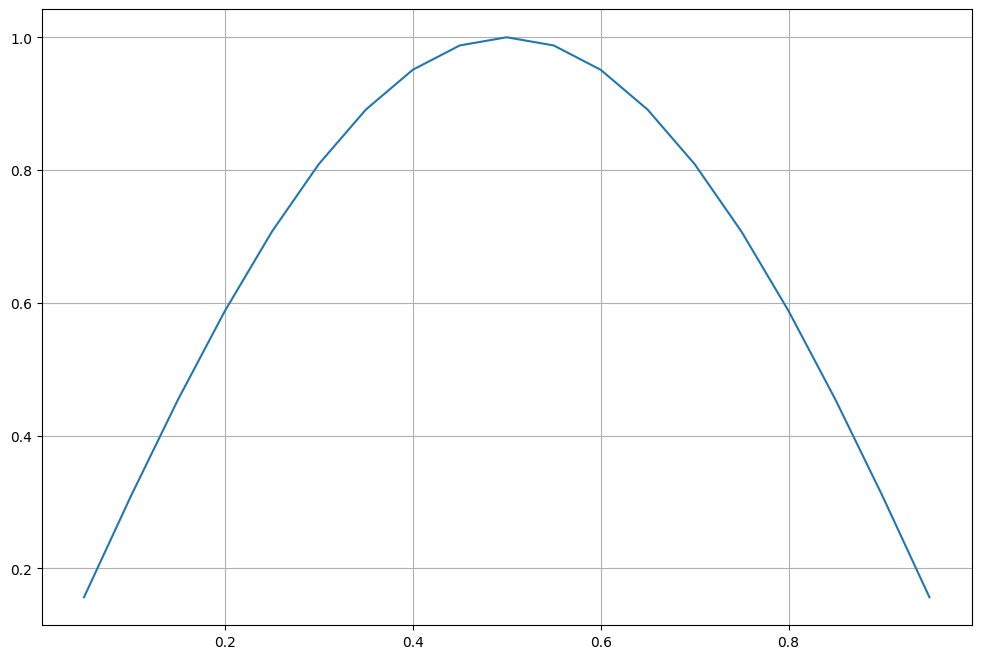

In [73]:
c = 1 # coeficiente de difusão
n = 20 # número de divisões da barra
L = 1.0 # comprimento da barra
h = L/n # tamanho do passo no espaço , posso escolher qualquer valor para h agora
dt = 0.001 # tamanho do passo no tempo
t_final = 0.1
cond = c*dt/h**2 # condição de estabilidade, lambda da matriz tridiagonal
# print(cond)
#condições de contorno (cada extremidade da barra)
T_left = 0.0
T_right = 0.0


diagonalPrincipal = 1+2*cond #diagonal principal da matriz tridiagonal 
diagonaisAdj = -cond #diagonais adjacentes da matriz tridiagonal
matriz = np.zeros((n-1,n-1))


#matriz constante no tempo
matriz = montaMatriz(n-1,matriz,diagonalPrincipal,diagonaisAdj)



# for i in range(n-1):
#     for j in range(n-1):
#         print(matriz[i][j], end=' ')
#     print(' ')



tempo = np.arange(0, t_final, dt) #espaçamento fisico de t = 0.01, arange para um vetor em um intervalo de de 0 a t_final com passo t
x = np.linspace(0, L, n+1) # quantidade n de pontos no espaço, linspace para um vetor num intervalo com n pontos
print(x,h)
T = np.zeros(n-1) 

T = g(x[1:-1])  #condição inicial, no miolo do vetor  
T_new = np.zeros(len(T))

b = np.zeros(n-1)  #vetor do lado direito da equação matricial Ax = b

x_plot = x[1:-1]


plt.figure(figsize=(12,8))
plt.plot(x_plot,T)
plt.grid(True)
plt.show() 



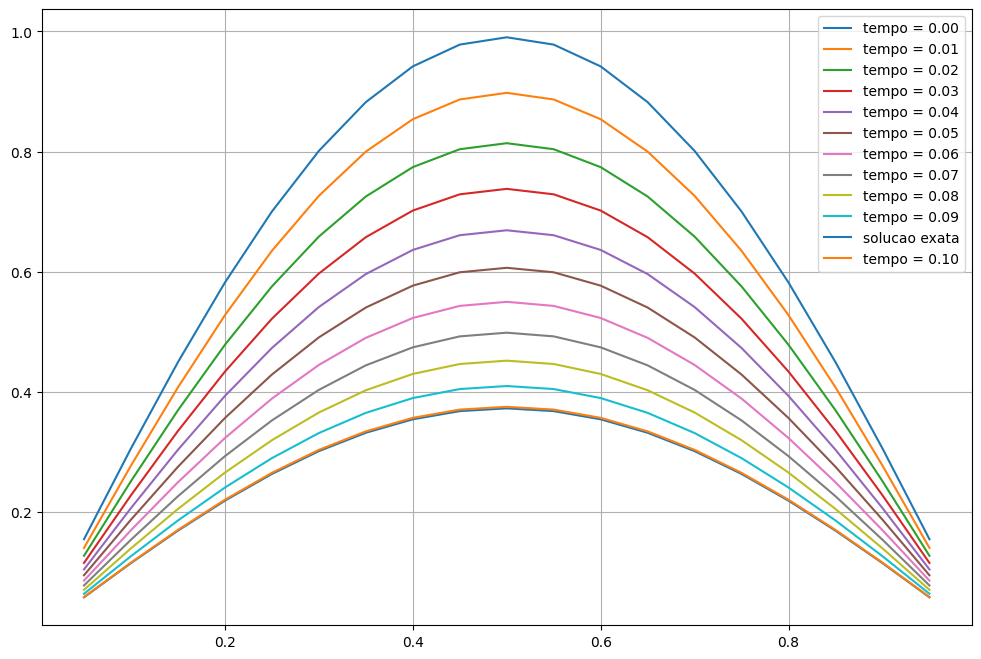

In [74]:
plt.figure(figsize=(12,8))

erros = [] 
erros_espacial = [] 

for i in range(len(tempo)):
    b[:]= T[:]
    
    T_new[:] = np.linalg.solve(matriz, b)
    
    
    # T_new[0]  = T_left     #condições de contorno
    # T_new[-1] = T_right


    T[:] = T_new.copy()
    if(i%10 == 0):
        plt.plot(x_plot,T_new,label = f'tempo = {tempo[i]:.2f}')

    # sol_atual = solucaoexata(x_plot,tempo[i])
    # erro = np.linalg.norm(T_new - sol_atual)/np.sqrt(n-1)
    # erro_espacial = np.abs(T_new - sol_atual)

    # erros_espacial.append(erro_espacial)
    # erros.append(erro)
    
# T_new = np.insert(T_new, 0, T_left)
# T_new = np.append(T_new, T_right)


plt.plot(x_plot,solucaoexata(x_plot,t_final), label ='solucao exata') 
plt.plot(x_plot, T_new,label = f'tempo = {t_final:.2f}')
plt.legend()
plt.grid(True) 

# plt.figure(figsize=(12,8))
# plt.grid(True)
# plt.plot(tempo,erros)

# plt.figure(figsize=(12,8))
# plt.plot(x_plot,erros_espacial[-1])
# plt.grid(True)

# plt.show() 


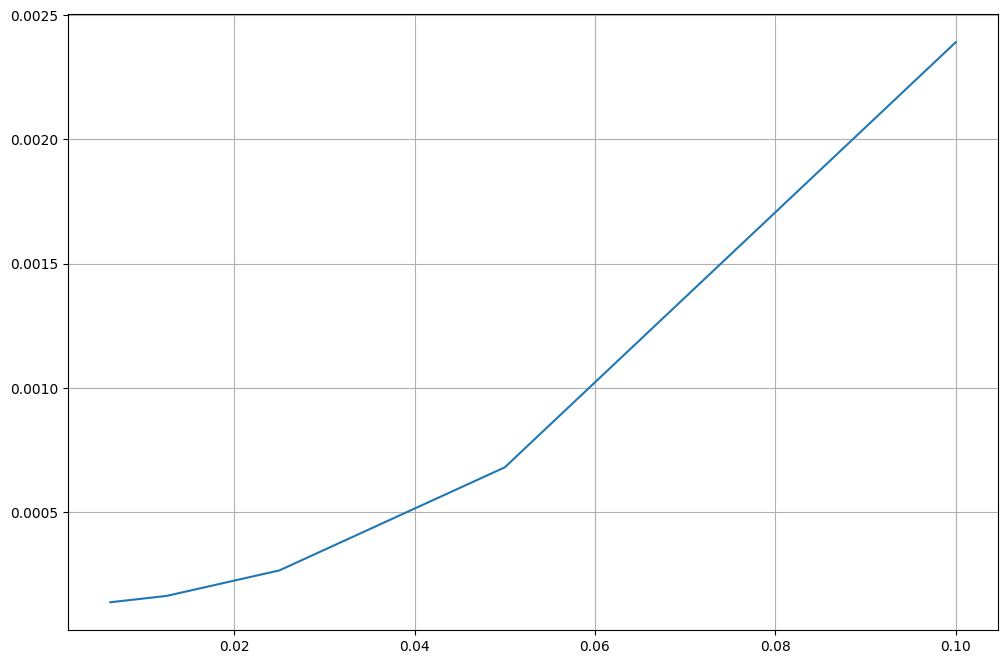

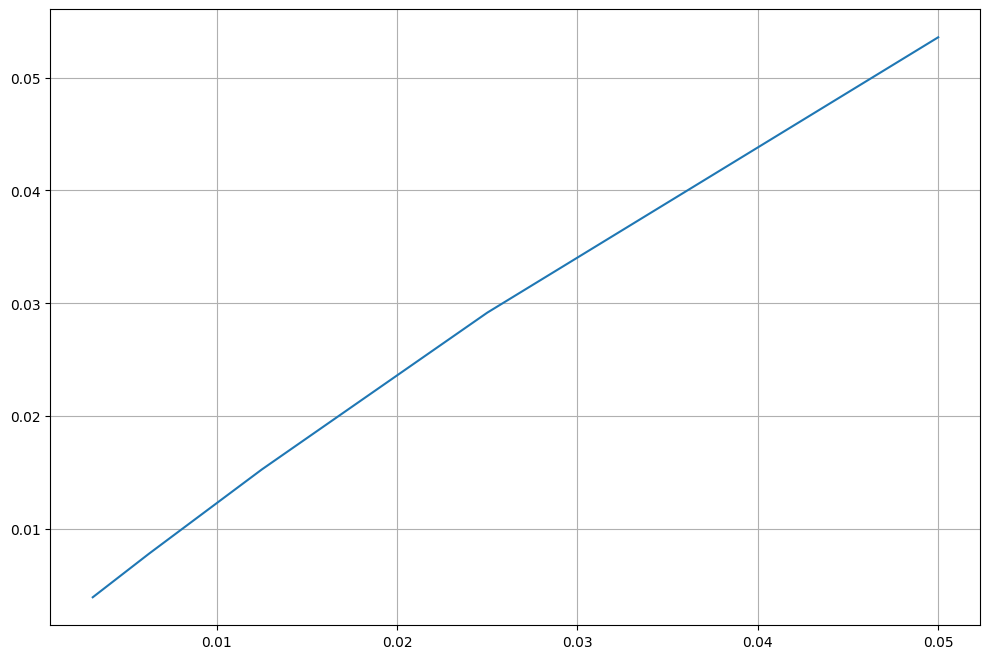

In [78]:
def calcErro(n, dt, tf = 0.1, c = 1, L = 1):
    h = L/n 
    cond  = c*dt/h**2

    diagonalPrincipal = 1+2*cond #diagonal principal da matriz tridiagonal 
    diagonaisAdj = -cond #diagonais adjacentes da matriz tridiagonal
    matriz = np.zeros((n-1,n-1))
    matriz = montaMatriz(n-1,matriz,diagonalPrincipal,diagonaisAdj)
   
    x = np.linspace(0,L,n+1)
    x_plot = x[1:-1]
    tempo = np.arange(0,tf,dt)
    
    T = g(x_plot)
    b = np.zeros(n-1)

    for i in range(len(tempo)):
        b[:] = T[:]
        T = np.linalg.solve(matriz,b)

        
    sol_exata = solucaoexata(x_plot, tf) 
    erro = np.linalg.norm(T-sol_exata)/np.sqrt(n-1)
    return erro, h




dt_fixo = 1e-4
N = [10,20,40,80,160]

erros_espaciais = [] 
dxs = [] 

for n in N:
    erro, h = calcErro(n,dt_fixo)
    erros_espaciais.append(erro)
    dxs.append(h)


plt.figure(figsize=(12,8))
plt.plot(dxs,erros_espaciais)
plt.grid(True)
plt.show() 




n_fixo = 300 
dts = [0.05, 0.025, 0.0125, 0.00625, 0.003125]

erros_temporais = [] 

for t in dts:
    erro, h = calcErro(n_fixo,t)
    erros_temporais.append(erro)



plt.figure(figsize=(12,8))
plt.plot(dts,erros_temporais)
plt.grid(True)
plt.show() 


